#  手写数字识别-KNN学习目标
- 

In [2]:
# 导入pyplot包
import matplotlib.pyplot as plt
# 导入Pandas包
import pandas as pd
# 导入训练集测试集划分包
from sklearn.model_selection import train_test_split
# 导入K临近算法包
from sklearn.neighbors import KNeighborsClassifier
# 导入跨线程/进程并行工具包 (!pip install joblib)
import joblib
# 导入集合计数器包
from collections import Counter


In [3]:
def show_digit_num(num_index):
    """
    获取对应索引数字像素值，并展示像素图片
    :param num_index: 
    :return: 
    """
    # 1、加载数据
    data = pd.read_csv('../../data/手写数字识别.csv')
    print(data.info())

    # 2、判断说印索引是否正确
    data_len = len(data)
    if num_index < 0 or num_index > data_len - 1:
        return

        # 3、获取数字像素数据
    x = data.iloc[:, 1:]
    y = data.iloc[:, 0]
    print('当前索引对应数字是：', y[num_index])

    # 4、将像素值改成多维数组对象
    num_pixel_arr = x.iloc[num_index]
    num_pixel_nd_arr = num_pixel_arr.values.reshape(28, 28)

    # 5、关闭坐标显示并绘图
    plt.axis('off')
    plt.imshow(num_pixel_nd_arr)
    plt.show()

In [4]:
def model_train():
    """
    使用KNN算法对模型训练
    :return: 
    """
    # 1、加载数据
    data = pd.read_csv('../../data/手写数字识别.csv')
    print(data.info())

    # 2、划分特征值（特征值转化为0～1之间）和目标值
    x = data.iloc[:, 1:] / 255
    y = data.iloc[:, 0]
    print('数据基本信息:', x.shape)
    print('类别数据比例:', Counter(y))

    # 3、数据集划分
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

    # 4、使用KNN对模型进行训练
    estimator = KNeighborsClassifier(n_neighbors=3)
    estimator.fit(x_train, y_train)

    # 5、模型评估
    acc = estimator.score(x_test, y_test)
    print('测试集准确率: %.2f' % acc)

    # 6、模型保存
    joblib.dump(estimator, '../file/knn.pth')

In [6]:
def model_predict():
    """
    通过模型预测结果
    :return: 
    """
    # 1、读取图片
    img = plt.imread('../file/eight.png')
    plt.imshow(img)

    # 2、加载模型
    knn = joblib.load('../file/knn.pth')
    predict_res = knn.predict(img.reshape(1, -1))
    print('您绘制的数字是:', predict_res)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
当前索引对应数字是： 9


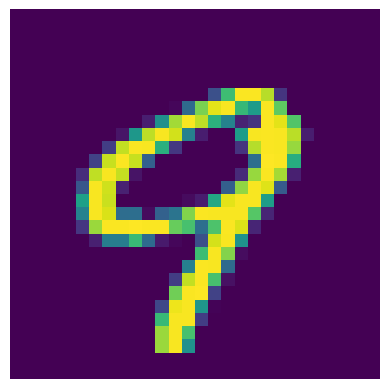

In [5]:
# 展示索引对应图片
show_digit_num(100)

In [7]:
# 训练模型
model_train()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
数据基本信息: (42000, 784)
类别数据比例: Counter({1: 4684, 7: 4401, 3: 4351, 9: 4188, 2: 4177, 6: 4137, 0: 4132, 4: 4072, 8: 4063, 5: 3795})


/root/anaconda3/envs/AI/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 12] Cannot allocate memory
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/root/anaconda3/envs/AI/lib/python3.9/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
  File "/root/anaconda3/envs/AI/lib/python3.9/subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "/root/anaconda3/envs/AI/lib/python3.9/subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/root/anaconda3/envs/AI/lib/python3.9/subprocess.py", line 1770, in _execute_child
    self.pid = _posixsubprocess.fork_exec(


测试集准确率: 0.97


In [ ]:
# 通过模型预测结果
model_train()